<a href="https://colab.research.google.com/github/SiddharthNarayanan8194/Tasks-Sparks-Foundation-SEP23/blob/main/TASK_5_GRIP_SEPT23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Siddharth Narayanan**
## **Data Science and Business Analytics Intern @ The Sparks Foundation**
## **Task 5**: Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'

### **Problem Statement**:

1) As a Sports Analyst, find out the most successful teams, players and factors contrubuting to the win or loss of a team.

2) Suggest teams or players a company should endorse for its products.

###**Importing Libraries**

In [1]:
#Importing all the required libraries for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###**Importing the Dataset 'Indian Premier League**'

In [2]:
# Installing Kaggle
!pip install -q kaggle
# Upload kaggle.json file from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharthnarayanan94","key":"a0277f5edd95cc8c02ea4c4b816905e2"}'}

In [3]:
# Creating a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copying the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# Getting permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Listing all datasets in kaggle
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                       Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          14080        447  1.0              
joebeachcapital/students-performance                          Students Performance                            2KB  2023-08-31 00:50:11           4885        130  1.0              
iamsouravbanerjee/airline-dataset                             Airline Dataset                                 8MB  2023-09-13 06:47:17           5345        122  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target     Zzzs: Lightweight training dataset + t

In [7]:
# Copying the API Command
!kaggle datasets download -d manasgarg/ipl

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 126MB/s]


In [8]:
# Unzipping the zip files
! unzip ipl.zip

Archive:  ipl.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [9]:
# Reading the 'Indian Premier League' Dataset
data_matches= pd.read_csv("matches.csv",encoding="ISO-8859-1")
print("Data Imported Successfully")

Data Imported Successfully


In [10]:
# Reading the 'Indian Premier League' Dataset
data_delivery=pd.read_csv("deliveries.csv",encoding="ISO-8859-1")
print("Data Imported Successfully")

Data Imported Successfully


###**Exploring the Data**

In [11]:
data_matches.head(10) # Displaying top 10 rows for matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [12]:
data_matches.tail(10) # Displaying bottom 10 rows for matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
626,627,2016,Kanpur,2016-05-19,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,Green Park,AK Chaudhary,CK Nandan,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
629,630,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [13]:
data_delivery.head(10) # Displaying top 10 rows for deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [14]:
data_delivery.tail(10) # Displaying bottom 10 rows for deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150450,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,3,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150451,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,4,CJ Jordan,Sachin Baby,Mustafizur Rahman,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150452,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,5,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150453,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,Sachin Baby,CJ Jordan,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150454,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,CJ Jordan,Sachin Baby,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [15]:
# Displaying total number of rows & columns
np.shape(data_delivery)

(150460, 21)

In [16]:
# Understanding the Data Structure
data_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [17]:
# Understanding the structure of the data
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [18]:
# Fetching information on Descriptive Statistics
data_delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [19]:
# Fetching information on Descriptive Statistics
data_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [20]:
# Showing correlations between different variables in  delivery dataset
data_delivery.corr(method='pearson')

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


In [21]:
# Showing correlations between different variables in matches dataset
data_matches.corr(method='pearson')

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
id,1.000000,0.471087,0.024281,-0.010263,-0.015510,NaN
season,0.471087,1.000000,0.004170,-0.016815,-0.000708,NaN
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640,NaN
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181,NaN
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000,NaN
umpire3,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Preparation & Cleaning**

In [22]:
data_delivery.isnull() # Checking for missing values using isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
150458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [23]:
data_matches.isnull() # Checking for missing values using isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


The isnull() function returns dataframe of Boolean values which are True for NaN (Not a Number) values.

In [24]:
data_matches.columns.values # Showing all columns in the matches dataset

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [25]:
data_delivery.columns.values # Showing all columns in the deliveries dataset

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [26]:
data_matches.city.unique() # Showing all cities

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [27]:
data_matches.team1.unique() # Showing all participating teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [28]:
data_matches.team1.replace(to_replace="Rising Pune Supergiant",value="Rising Pune Supergiants"
,inplace=True,regex=True) # Replacing Rising Pune Supergiant with Rising Pune Supergiants

In [29]:
data_matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiantss'], dtype=object)

In [30]:
data_matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [31]:
data_matches.venue.isnull().sum() # Checking for missing values in Venue column


0

In [32]:
data_matches.city.isnull().sum()  # Checking for missing values in City column

7

In [33]:
 # Replacing all missing city names with venu names
data_matches['city'].fillna(data_matches['venue'], inplace = True)

In [34]:
data_matches.city.isnull().sum()  # Checking for missing values again in City column

0

In [35]:
data_delivery.dismissal_kind.fillna("Not Available",inplace=True)

In [36]:
data_matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

In [37]:
data_matches.winner.fillna("tie/no result",inplace=True)

In [38]:
data_matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'tie/no result', 'Rising Pune Supergiants'],
      dtype=object)

In [39]:
data_matches.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [40]:
data_matches.drop(['umpire3'], axis=1,inplace=True) # Dropping umpire3 column as it is not useful

In [41]:
data_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [42]:
data_matches.player_of_match.unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

In [43]:
data_delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind           0
fielder             145091
dtype: int64

In [44]:
data_delivery.dismissal_kind.unique() # Displaying way of dismissals

array(['Not Available', 'caught', 'bowled', 'run out', 'lbw',
       'caught and bowled', 'stumped', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [45]:
data_delivery.dismissal_kind.unique() # Displaying way of dismissals again to show changes

array(['Not Available', 'caught', 'bowled', 'run out', 'lbw',
       'caught and bowled', 'stumped', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [46]:
data_delivery.player_dismissed.unique() # Displaying all dismissed players

array([nan, 'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'PA Patel', 'RG Sharma', 'JC Buttler', 'AT Rayudu', 'KH Pandya',
       'N Rana', 'KA Pollard', 'TG Southee', 'MA Agarwal', 'AM Rahane',
       'BA Stokes', 'JJ Roy', 'BB McCullum', 'AJ Finch', 'KD Karthik',
       'SPD Smith', 'MS Dhoni', 'DT Christian', 'M Vohra', 'WP Saha',
       'HM Amla', 'AR Patel', 'Vishnu Vinod', 'P Negi', 'AP Tare',
       'KK Nair', 'SW Billings', 'SV Samson', 'CH Morris',
       'CR Brathwaite', 'PJ Cummins', 'RR Pant', 'S Nadeem', 'SK Raina',
       'DR Smith', 'DS Kulkarni', 'G Gambhir', 'RV Uthappa', 'CA Lynn',
       'YK Pathan', 'SA Yadav', 'CR Woakes', 'SP Narine', 'RA Tripathi',
       'F du Plessis', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda',
       'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha', 'Rashid Khan',
       'MP S

In [47]:
data_delivery.fielder.unique() # Displaying all fielder names

array([nan, 'Mandeep Singh', 'Sachin Baby', 'DA Warner', 'BCJ Cutting',
       'Yuvraj Singh', 'MC Henriques', 'CJ Jordan (sub)', 'MS Dhoni',
       'R Bhatia', 'MA Agarwal', 'RG Sharma', 'N Rana', 'TG Southee',
       'YK Pathan', 'Kuldeep Yadav', 'MP Stoinis', 'M Vohra',
       'GJ Maxwell', 'MK Tiwary', 'BA Stokes', 'SV Samson', 'RR Pant',
       'SW Billings', 'S Nadeem', 'CH Morris', 'B Stanlake', 'STR Binny',
       'S Dhawan', 'V Shankar (sub)', 'NV Ojha', 'Rashid Khan',
       'BB McCullum', 'MJ McClenaghan', 'HH Pandya', 'KA Pollard',
       'RV Uthappa', 'R Dhawan (sub)', 'SP Narine', 'WP Saha', 'KK Nair',
       'A Mishra', 'PA Patel', 'B Kumar', 'G Gambhir', 'MK Pandey',
       'CR Woakes', 'SA Yadav', 'AR Patel', 'JC Buttler', 'JJ Bumrah',
       'CH Gayle', 'S Aravind', 'AB de Villiers', 'SK Raina', 'AJ Finch',
       'Ishan Kishan', 'RD Chahar', 'C de Grandhomme', 'EJG Morgan',
       'DA Miller', 'MM Sharma', 'Z Khan', 'KH Pandya', 'JJ Roy',
       'KD Karthik', 'RA Jad

###**Data Visualization**

In [48]:
wins_each_season = data_matches.groupby("season")["winner"].value_counts()
wins_each_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2017    Sunrisers Hyderabad             8
        Kings XI Punjab                 7
        Delhi Daredevils                6
        Gujarat Lions                   4
        Royal Challengers Bangalore     3
Name: winner, Length: 86, dtype: int64

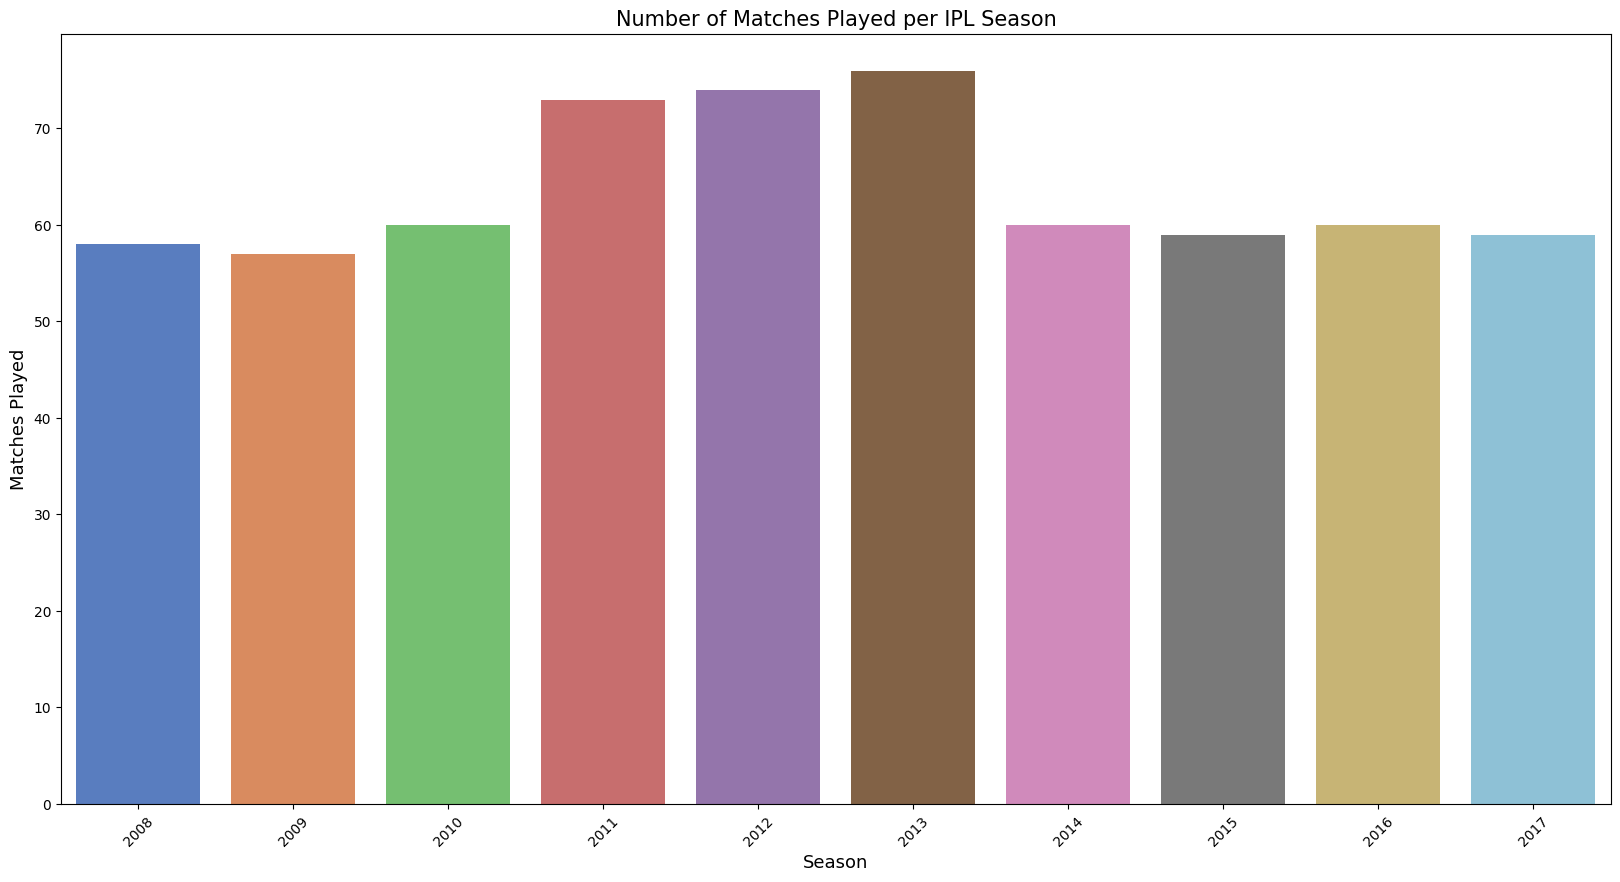

In [49]:
plt.figure(figsize=(20, 10))
sns.countplot(x='season', data=data_matches, palette='muted')
plt.title("Number of Matches Played per IPL Season", fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Season", fontsize=13)
plt.ylabel('Matches Played', fontsize=13)
plt.show()

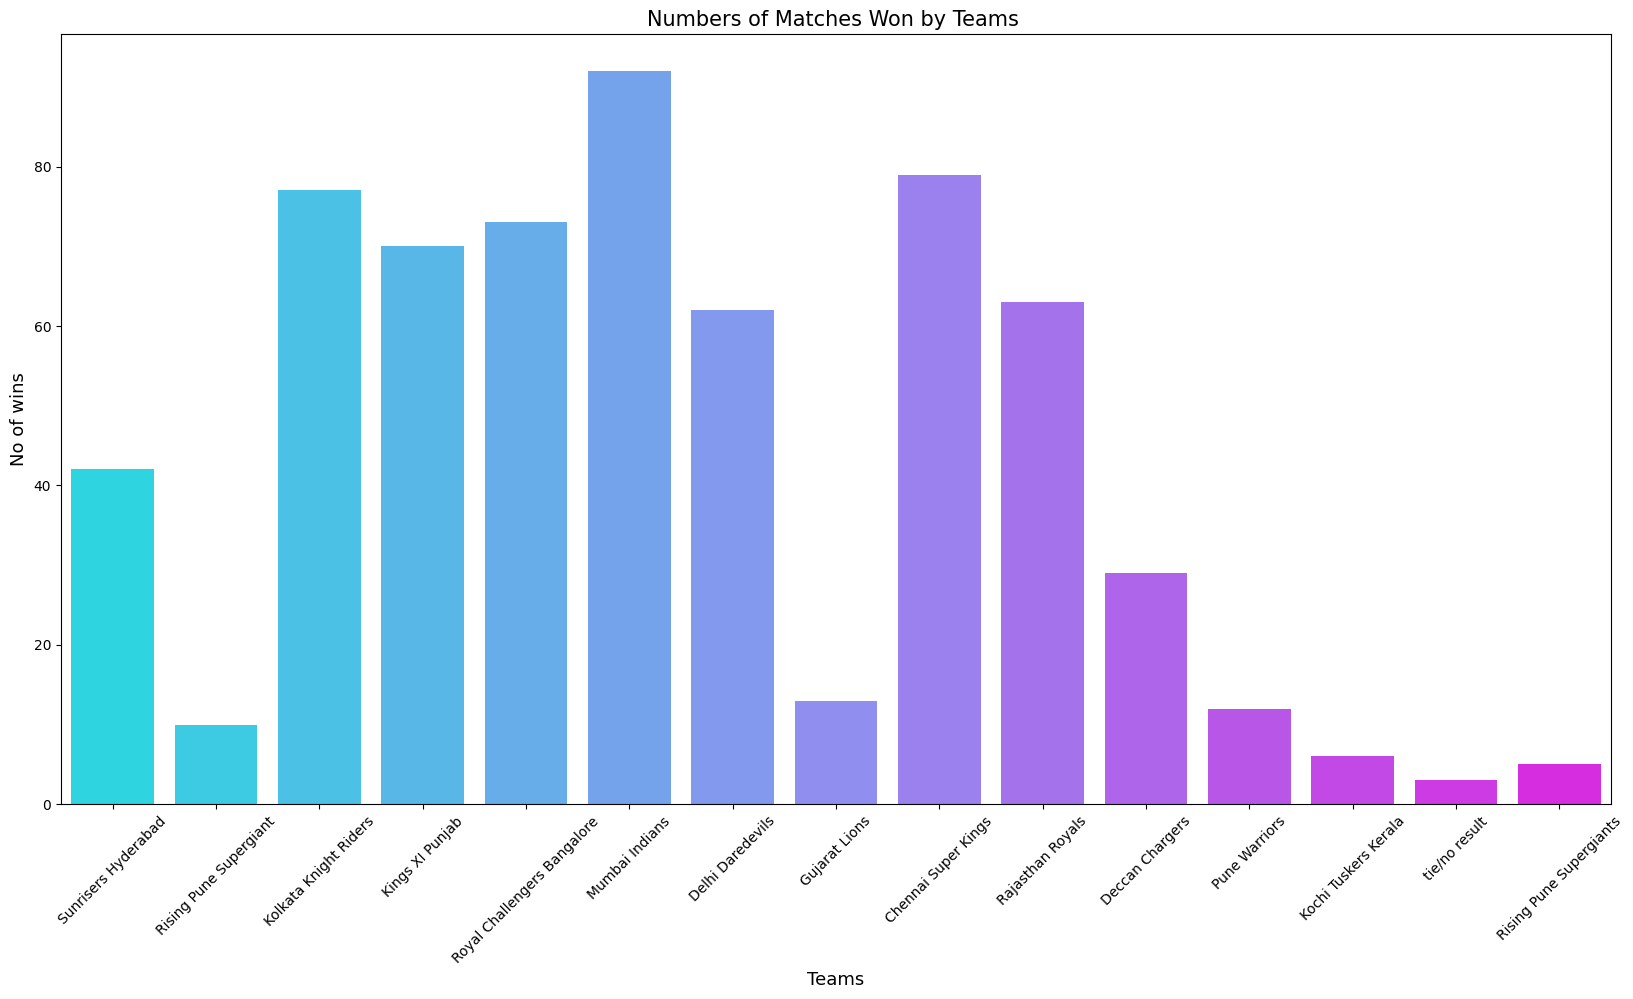

In [50]:
plt.figure(figsize = (20,10))
sns.countplot(x='winner', data=data_matches , palette='cool')
plt.title("Numbers of Matches Won by Teams ",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Teams",fontsize=13)
plt.ylabel("No of wins",fontsize=13)
plt.show()

Text(0.5, 1.0, 'Top 5 Winning Teams')

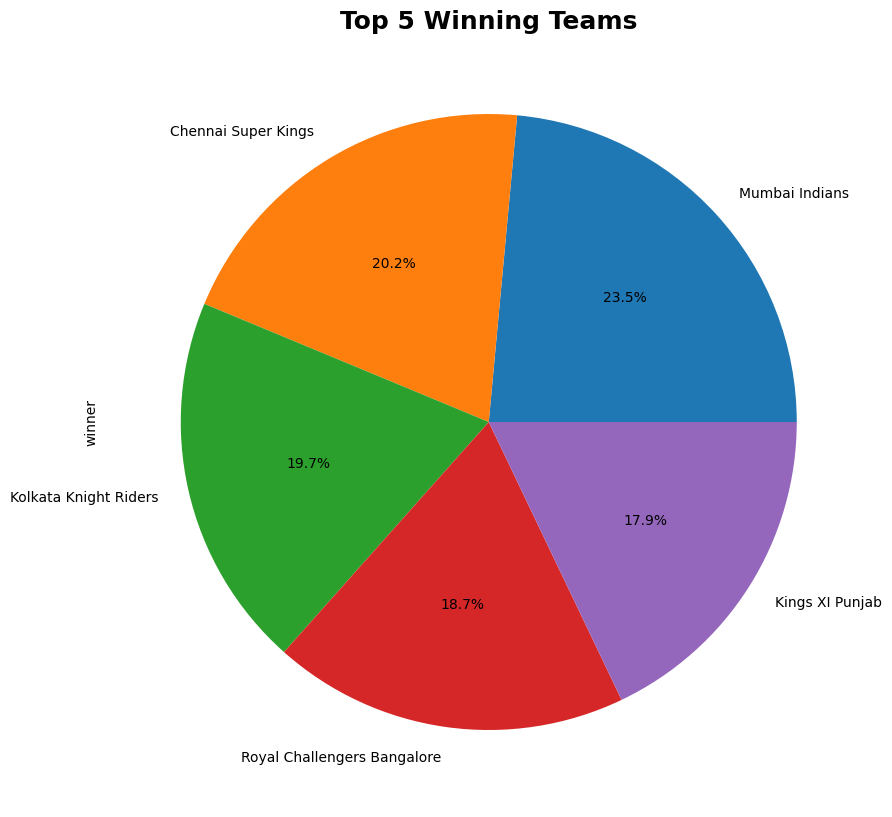

In [51]:
data_matches['winner'].value_counts()[:5].plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Top 5 Winning Teams',fontsize=18,fontweight='bold')

Text(0.5, 1.0, 'Top 5 Toss Winners')

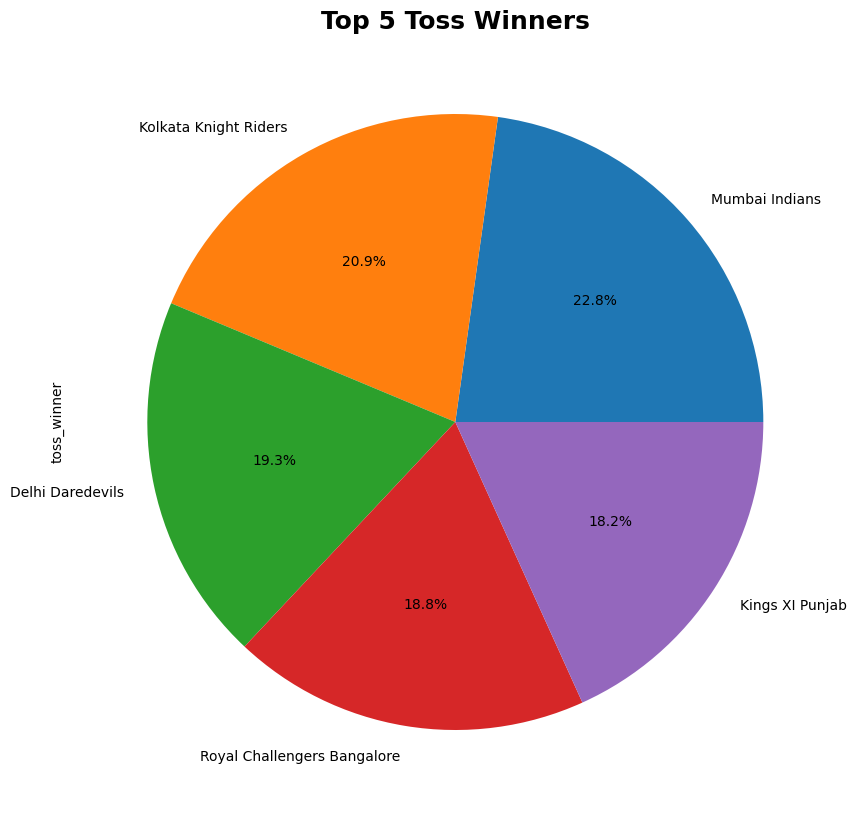

In [52]:
data_matches['toss_winner'].value_counts()[:5].plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Top 5 Toss Winners',fontsize=18,fontweight='bold')

In [53]:
data_matches['win_by']=np.where(data_matches['win_by_runs']>0,'Bat first','Bowl first')
data_matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Bowl first
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Bowl first
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Bowl first
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Bat first


Text(0.5, 1.0, 'Match Result (Win By)')

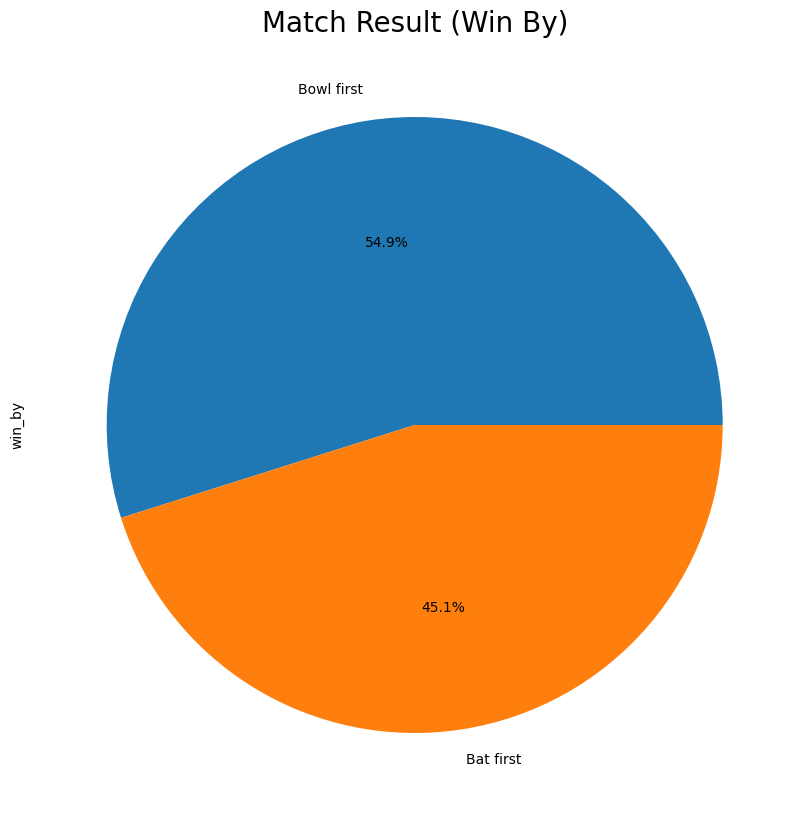

In [54]:
data_matches['win_by'].value_counts().plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Match Result (Win By)', fontsize=20)

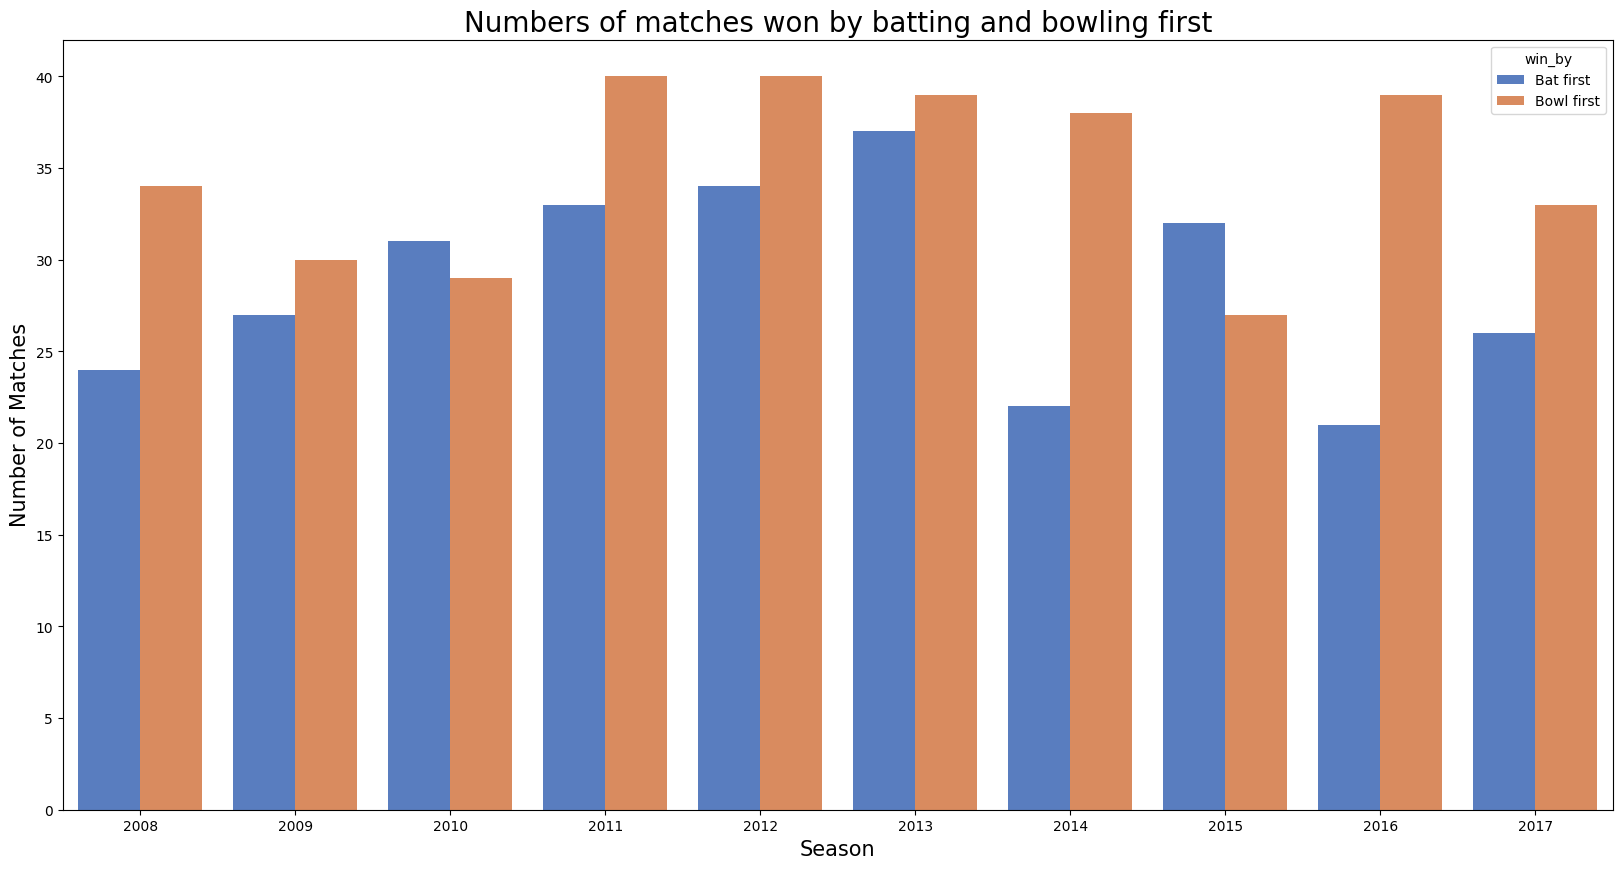

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x='season', hue='win_by', data=data_matches, palette='muted')
plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Number of Matches", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Toss Result')

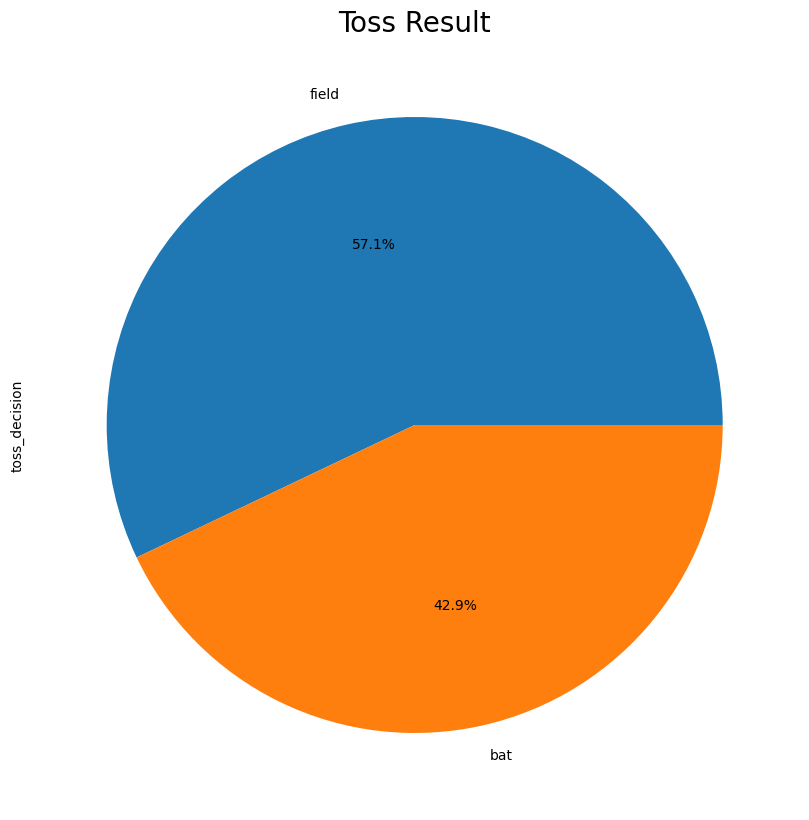

In [56]:
data_matches['toss_decision'].value_counts().plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Toss Result', fontsize=20)

Text(0.5, 1.0, 'Top 5 Match Winners')

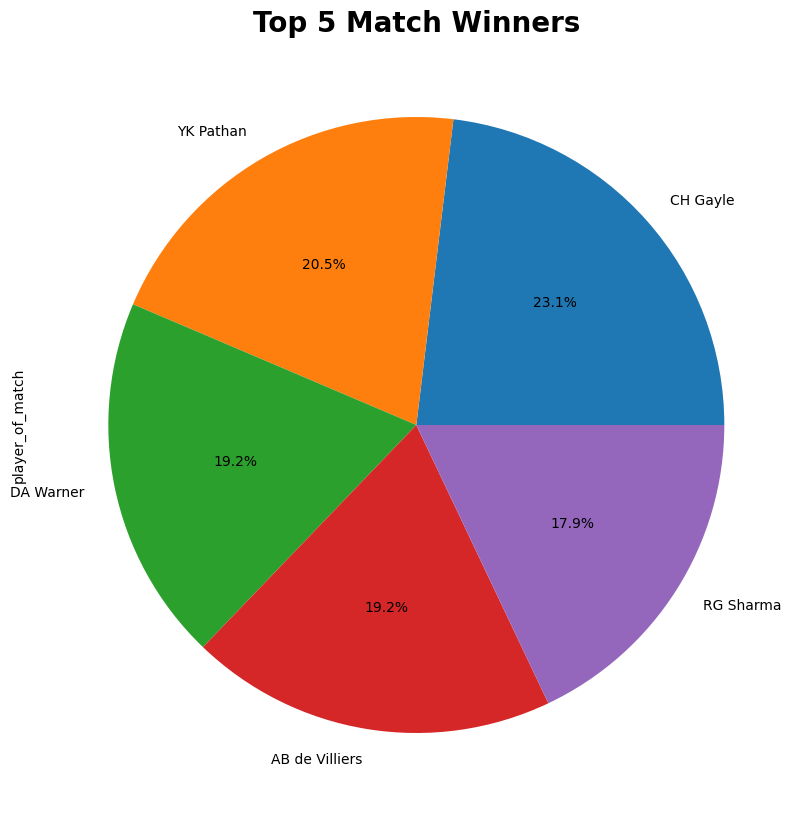

In [57]:
data_matches['player_of_match'].value_counts()[:5].plot(kind='pie',figsize=[20,10],autopct='%1.1f%%')
plt.title('Top 5 Match Winners', fontsize=20,fontweight='bold')

In [58]:
data_matches[['toss_winner','toss_decision','winner']]

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
...,...,...,...
631,Royal Challengers Bangalore,field,Royal Challengers Bangalore
632,Royal Challengers Bangalore,field,Royal Challengers Bangalore
633,Kolkata Knight Riders,field,Sunrisers Hyderabad
634,Sunrisers Hyderabad,field,Sunrisers Hyderabad


In [61]:
gkk=data_delivery.groupby(['batsman'])['batsman_runs'].agg(['sum']).sort_values('sum',ascending=False)
gkk=gkk.rename(columns={'sum':'total runs'})
gkk.head(10)



,total runs
batsman,
SK Raina,4548
V Kohli,4423
RG Sharma,4207
G Gambhir,4132
DA Warner,4014
RV Uthappa,3778
CH Gayle,3651
S Dhawan,3561
MS Dhoni,3560


In [67]:
data_delivery.groupby(['bowler'])['noball_runs'].sum().sort_values(ascending=False)


bowler
S Sreesanth          27
I Sharma             21
A Mishra             20
SL Malinga           18
JA Morkel            18
                     ..
Mohammad Nabi         0
B Geeves              0
Mohammed Siraj        0
Mustafizur Rahman     0
Ankit Sharma          0
Name: noball_runs, Length: 356, dtype: int64

###**Conclusions from the Exploratory Data Analysis of dataset 'Indian Premier League'**

1) The highest number of matches were played in IPL seasons 2012 & 2013.

2) Mumbai Indians is the team with the most number of wins.

3) Rising Pune Supergiants is the IPL team with the least number of wins.

4) Mumbai Indians and Chennai Super Kings hold the highest shares in win
   percentage.

5) Mumbai Indians and Kolkata Knight Riders have won the toss in most matches.

6) The probability of a team winning a match is higher when it opts to bowl
   first.

7) During IPL seasons 2011 and 2012, the highest number of matches were won by
   bowling first.

8) During IPL seasons 2012 and 2013, the highest number of matches were won by
   batting first.

9) After winning the toss,the chances of a team opting to field first is higher
   than opting to bat first.

10) CH Gayle tops the list for most "Player of the Match" titles.
    

11) SK Raina, V Kohli and RG Sharma are the top 3 run scorers across all IPL
    seasons.  

12) S Sreesanth has gone for most runs while balling no-balls.

13) SK Raina has played most number of matches in all IPL seasons.